In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sc
import sympy as sp

In [7]:
datos = "../data/FluidosPerfo.csv"
flu = pd.read_csv(datos, skiprows=[0,1], index_col=0)
flu

,TAU
RHO,
5.11,2.80
10.21,3.25
17.02,3.33
34.05,4.17
51.07,4.00
102.14,5.75
136.18,6.17
170.23,6.50
340.46,9.92


Text(0, 0.5, 'Esfuerzo cortante [Pa]')

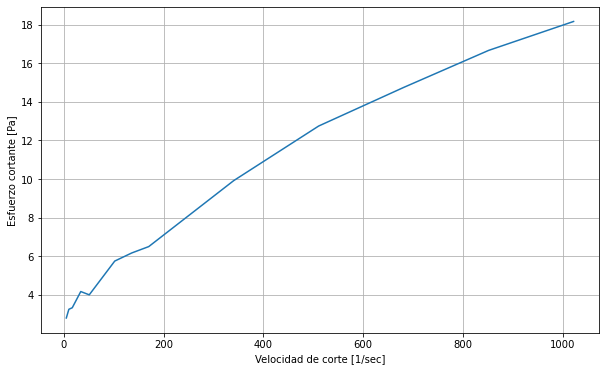

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(flu)
ax.grid()
ax.set_xlabel("Velocidad de corte [1/sec]")
ax.set_ylabel("Esfuerzo cortante [Pa]")


La ecuación es 0.015481715179811072*x + 3.6444165766986765


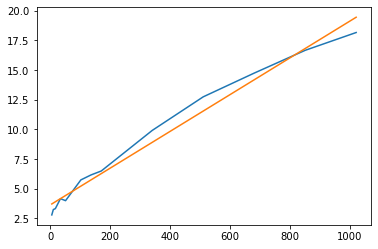

In [12]:
#Bingham
x = np.array(flu.index)
y = np.array(flu.TAU)
coef = np.polyfit(x, y, 1)
z = coef[0]*x + coef[1]
plt.plot(x,y)
plt.plot(x,z)

print(f"La ecuación es {coef[0]}*x + {coef[1]}")

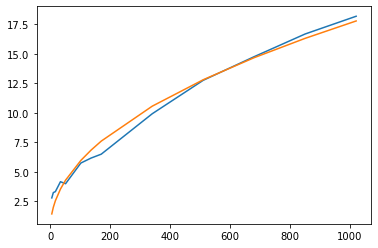

In [15]:
#Exponencial
x = np.array(flu.index)
y = np.array(flu.TAU)

# y = a*(x**b)

coef2 = sc.curve_fit(lambda x, a, b: a*(x ** b), x, y)

z = coef2[0][0]*(x ** coef2[0][1])
plt.plot(x,y)
plt.plot(x,z)
#coef2
#print(f"La ecuación es {coef2[0][0]}x^{coef2[0][1]})")

La ecuación es 2.4085604644334575 + 0.12524925087381775(x^0.7009948933485463)


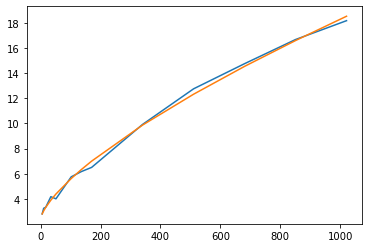

In [13]:
#Exponencial modificado
x = np.array(flu.index)
y = np.array(flu.TAU)

coef3 = sc.curve_fit(lambda x, a, b, c: a+b*(x**c),x,y)
z = coef3[0][0] + coef3[0][1]*(x ** coef3[0][2])
plt.plot(x,y)
plt.plot(x,z)

print(f"La ecuación es {coef3[0][0]} + {coef3[0][1]}(x^{coef3[0][2]})")

(-8.425884351152897e-06*0.0009951752463915684*x + (--8.425884351152897e-06 + 0.025431427776194684*0.0009951752463915684)*np.log((1+0.0009951752463915684*x)**2)/2)/0.0009951752463915684**2 +2.945355141688533 


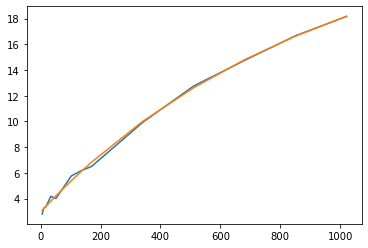

In [23]:
#Logarítmico lineal

x = np.array(flu.index)
y = np.array(flu.TAU)

#coef4 = sc.curve_fit(lambda x, a, b, c, k:((a*c-b)*np.log(c*x+1))/c**2+b*x/c+k, x, y)

coef4 = sc.curve_fit(lambda x, a, b, c, k:(b*c*x + (-b + a*c)*np.log((1+c*x)**2)/2)/c**2 + k, x, y)

a = coef4[0][0]
b = coef4[0][1]
c = coef4[0][2]
k = coef4[0][3]
z = (b*c*x + (-b + a*c)*np.log((1+c*x)**2)/2)/c**2 + k
plt.plot(x,y)
plt.plot(x,z)

print(f"({b}*{coef4[0][2]}*x + (-{coef4[0][1]} + {coef4[0][0]}*{coef4[0][2]})*np.log((1+{coef4[0][2]}*x)**2)/2)/{coef4[0][2]}**2 +{coef4[0][3]} ")